IMPORT LIBRARIES

In [4]:
from skimage.data import coins
import matplotlib.pyplot as plt
import numpy as np
import time
from tifffile import imwrite
from PIL import Image
import os
from tifffile import imread
import tkinter as tk
from tkinter import filedialog


OPEN STACK YOU WANT TO DIVIDE

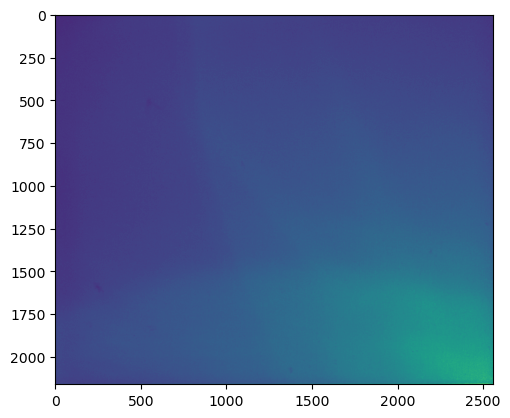

In [7]:
root = tk.Tk()
root.withdraw()

file_path = filedialog.askopenfilename()
stack = imread(file_path)
img = imread(file_path)
II=np.array(img)
II.shape
plt.imshow(II[0,:,:])

PARAMETERS OF THE IMAGE, NUMBER OF ROWS AND COLUMNS

In [ ]:
rows_number=6
columns_number=9
time_points=II.shape[0]


x0=100
y0=50
xf=4824
yf=3550

DIVIDE AND SAVE THE CROPS AS INDIVIDUAL FILES INTO FOLDERS

In [ ]:
sizex=xf-x0
sizey=yf-y0
pitchx=int(np.floor(sizex/columns_number))
pitchy=int(np.floor(sizey/rows_number))
Crop=np.zeros([time_points,pitchy,pitchx])
Sub_image=np.zeros([rows_number*columns_number,pitchy,pitchx])

for ii in range(rows_number):
    for jj in range(columns_number):
        z=jj+columns_number*(ii)
        xz=x0+jj*pitchx
        yz=y0+ii*pitchy
        Crop=II[:,yz:yz+pitchy,xz:xz+pitchx]
        name='Well'+str(z)+'.tiff'
        name_folder= r'E:\Incubascope_cellpose\test'+str(z)
        if not os.path.exists(name_folder):
            os.makedirs(name_folder)
        TT=Sub_image[z,:,:]
        imwrite('E:\\Incubascope_cellpose\\test'+str(z)+'\\'+name,Crop)
        